In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/Mall_Customers.csv')
print(dataset.shape)
x = dataset.iloc[:,[3,4]].values
x=pd.DataFrame(x)


(200, 5)


In [5]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


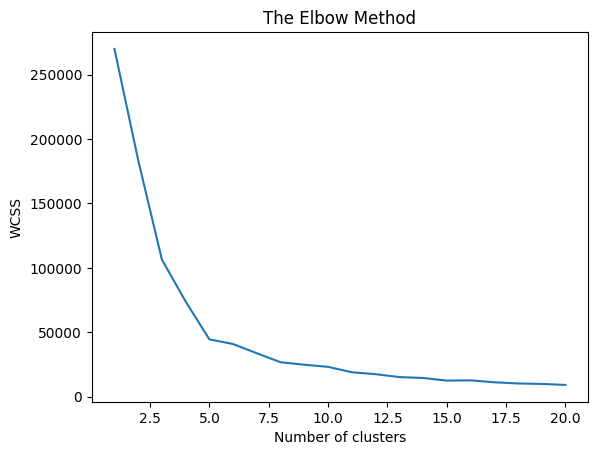

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# define range of cluster number to evaluate
k_range = range(1, 21)


In [8]:
#compute wcss for each cluster number
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [9]:
#fitting kmeans to the dataset
Kmeans = KMeans(n_clusters = 5 , init = 'k-means++', random_state = 42)
y_kmeans = Kmeans.fit_predict(x)
x[y_kmeans==0]

,0,1
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


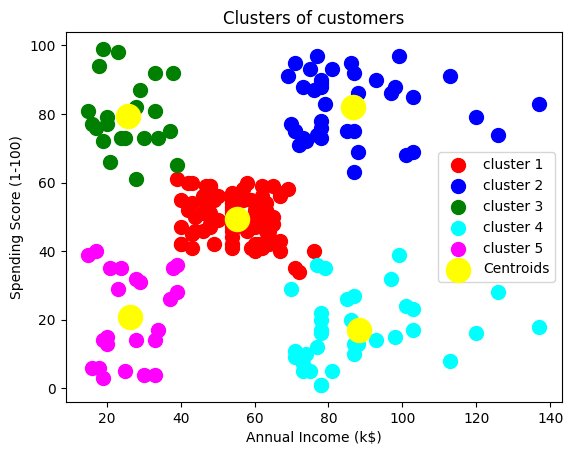

In [15]:
plt.scatter(x[y_kmeans == 0][0] , x[y_kmeans== 0][1] ,s=100 , c='red' , label = 'cluster 1')
plt.scatter(x[y_kmeans == 1][0] , x[y_kmeans== 1][1] ,s=100 , c='blue' , label = 'cluster 2')
plt.scatter(x[y_kmeans == 2][0] , x[y_kmeans== 2][1] ,s=100 , c='green' , label = 'cluster 3')
plt.scatter(x[y_kmeans == 3][0] , x[y_kmeans== 3][1] ,s=100 , c='cyan' , label = 'cluster 4')
plt.scatter(x[y_kmeans == 4][0] , x[y_kmeans== 4][1] ,s=100 , c='magenta' , label = 'cluster 5')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()